In [1]:
# Step 1: Import the necessary library for file uploading
from google.colab import files

# Step 2: Upload the .zip file containing your folder
uploaded = files.upload()

Saving output.zip to output (1).zip


Install dependencies

In [2]:
!sudo update-locale LANG=en_US.UTF-8 LC_ALL=en_US.UTF-8

In [3]:
import zipfile, os, pathlib, shutil, random

In [4]:
!pip install ultralytics

Zip file name

In [5]:
zip_filename = list(uploaded.keys())[0]

In [6]:
base_training_filename = pathlib.Path(zip_filename).stem

Define path

In [7]:
destination_folder = os.path.join("/content",base_training_filename)

Create output folder

In [8]:
os.makedirs(destination_folder, exist_ok=True)

Upzip training file

In [10]:
# Unzip the file
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)

In [13]:
print(f"Unzip training file to {destination_folder}")

Unzip training file to /content/output (1)


Copy yaml file

In [11]:
shutil.copy(os.path.join("/content",base_training_filename,"data.yaml"),os.path.join("/content","data.yaml"))

'/content/data.yaml'

In [14]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11m.yaml").load("yolo11m.pt")  # build from YAML and transfer weights

# Train the model
results = model.train(data=f"/content/data.yaml", epochs=500, imgsz=640)

Transferred 649/649 items from pretrained weights
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.yaml, data=/content/data.yaml, epochs=500, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=yolo11m.pt, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop

train: Scanning /content/output/train.cache... 79 images, 0 backgrounds, 0 corrupt: 100%|██████████| 79/79 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/output/val.cache... 5 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5/5 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000213, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 500 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/500      8.76G      3.402      5.498      2.468        444        640: 100%|██████████| 5/5 [00:04<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all          5        137          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/500      8.69G      3.103      5.396      2.261        558        640: 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.11it/s]


                   all          5        137   0.000838     0.0172   0.000658     0.0002

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/500      8.68G      1.962      4.895      1.652        523        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.19it/s]

                   all          5        137     0.0498      0.217     0.0526     0.0344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/500      8.71G      1.598      4.136      1.421        491        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.37it/s]


                   all          5        137      0.357      0.173      0.083     0.0519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/500      8.69G      1.537      3.614      1.349        455        640: 100%|██████████| 5/5 [00:03<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.42it/s]

                   all          5        137      0.596      0.148      0.177      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/500       8.8G      1.412      2.889      1.264        490        640: 100%|██████████| 5/5 [00:02<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.05it/s]


                   all          5        137      0.543      0.255      0.245      0.167

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/500      8.85G       1.37      2.355       1.22        598        640: 100%|██████████| 5/5 [00:02<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.66it/s]


                   all          5        137      0.417      0.361      0.316      0.228

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/500      8.79G       1.32      1.955      1.202        594        640: 100%|██████████| 5/5 [00:02<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.26it/s]

                   all          5        137      0.417      0.442      0.399      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/500      8.82G      1.261      1.755      1.165        583        640: 100%|██████████| 5/5 [00:02<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.84it/s]

                   all          5        137      0.529      0.416      0.455      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/500      8.69G      1.222       1.46      1.132        570        640: 100%|██████████| 5/5 [00:03<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]

                   all          5        137      0.536      0.484      0.495       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/500      8.87G      1.192      1.297      1.097        634        640: 100%|██████████| 5/5 [00:02<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.76it/s]

                   all          5        137      0.572      0.531       0.53      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/500      8.81G      1.196      1.254      1.128        429        640: 100%|██████████| 5/5 [00:02<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.19it/s]

                   all          5        137      0.795      0.524      0.686      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/500       8.7G      1.185      1.169      1.103        498        640: 100%|██████████| 5/5 [00:02<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.66it/s]

                   all          5        137       0.73      0.632      0.709      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/500      8.85G      1.136      1.038      1.081        628        640: 100%|██████████| 5/5 [00:02<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.66it/s]

                   all          5        137      0.753      0.653      0.739      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/500      8.84G       1.19       1.05      1.079        602        640: 100%|██████████| 5/5 [00:02<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.71it/s]

                   all          5        137      0.636      0.703      0.778      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/500      8.63G      1.179      1.005      1.061        549        640: 100%|██████████| 5/5 [00:02<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.69it/s]


                   all          5        137      0.597      0.788      0.775      0.516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/500      8.75G      1.147     0.9468      1.071        504        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.40it/s]

                   all          5        137      0.704      0.772      0.821      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/500      8.77G      1.117     0.9092      1.073        438        640: 100%|██████████| 5/5 [00:02<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.57it/s]

                   all          5        137      0.692      0.849      0.855      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/500      8.77G      1.159      0.882      1.061        488        640: 100%|██████████| 5/5 [00:02<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.25it/s]

                   all          5        137      0.662      0.937      0.909      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/500      8.73G      1.104     0.8535      1.055        470        640: 100%|██████████| 5/5 [00:03<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.70it/s]


                   all          5        137      0.711      0.883      0.886      0.624

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/500      8.69G      1.161     0.8798      1.102        671        640: 100%|██████████| 5/5 [00:02<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.42it/s]

                   all          5        137      0.774      0.846      0.902      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/500      8.86G      1.096     0.8255      1.049        569        640: 100%|██████████| 5/5 [00:02<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.16it/s]

                   all          5        137        0.8      0.865      0.905       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/500      8.68G      1.074      0.796       1.03        402        640: 100%|██████████| 5/5 [00:02<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.92it/s]

                   all          5        137      0.827       0.89      0.916       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/500      8.69G      1.081       0.79      1.059        489        640: 100%|██████████| 5/5 [00:03<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all          5        137      0.816      0.892      0.931      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/500      8.83G      1.071     0.7679      1.021        524        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.80it/s]

                   all          5        137      0.832       0.89      0.936      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/500      8.85G      1.043     0.7449      1.023        511        640: 100%|██████████| 5/5 [00:02<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.25it/s]

                   all          5        137      0.842      0.916      0.962      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/500      8.86G      1.021     0.7406      1.013        512        640: 100%|██████████| 5/5 [00:03<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.13it/s]

                   all          5        137      0.867      0.929       0.97      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/500      8.88G      1.044     0.7354      1.027        518        640: 100%|██████████| 5/5 [00:02<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.97it/s]

                   all          5        137      0.897      0.932      0.968      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/500       8.7G      1.025     0.7094      1.023        571        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.11it/s]

                   all          5        137      0.898      0.952      0.981      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/500      8.69G      1.003     0.6895      1.014        597        640: 100%|██████████| 5/5 [00:03<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.37it/s]

                   all          5        137      0.888      0.969      0.985      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/500      8.67G      1.051     0.6947      1.057        459        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.52it/s]

                   all          5        137      0.884      0.947      0.982      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/500      8.81G      1.046     0.7027      1.031        489        640: 100%|██████████| 5/5 [00:02<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.01it/s]

                   all          5        137      0.894      0.928      0.975      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/500      8.69G      1.052     0.6851       1.03        491        640: 100%|██████████| 5/5 [00:02<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.92it/s]

                   all          5        137      0.867      0.973      0.975      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/500      8.85G     0.9952     0.6522      1.004        653        640: 100%|██████████| 5/5 [00:02<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.70it/s]

                   all          5        137      0.891      0.969      0.985      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/500      8.81G      1.006     0.6498      0.996        562        640: 100%|██████████| 5/5 [00:02<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.78it/s]

                   all          5        137      0.907      0.942      0.968      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/500      8.51G      1.007     0.6477     0.9989        503        640: 100%|██████████| 5/5 [00:02<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.25it/s]

                   all          5        137      0.923      0.965      0.991      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/500      8.79G       1.03     0.6417     0.9996        600        640: 100%|██████████| 5/5 [00:03<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.03it/s]


                   all          5        137      0.903       0.94      0.961      0.703

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/500      8.82G     0.9931     0.6162     0.9984        568        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.72it/s]

                   all          5        137      0.905      0.953       0.97      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/500      8.79G      1.001      0.622      1.018        456        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.05it/s]

                   all          5        137      0.899      0.979      0.991      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/500      8.84G      1.021     0.6242      1.002        514        640: 100%|██████████| 5/5 [00:02<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.28it/s]

                   all          5        137      0.919      0.977      0.992      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/500      8.72G     0.9995      0.619      1.016        391        640: 100%|██████████| 5/5 [00:02<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.82it/s]

                   all          5        137      0.906      0.955      0.978      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/500      8.85G     0.9691     0.5986      1.002        482        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.97it/s]

                   all          5        137      0.927      0.959      0.973      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/500      8.83G     0.9689      0.577     0.9783        601        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.23it/s]

                   all          5        137      0.928      0.962      0.982      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/500      8.72G     0.9868     0.6035      1.012        423        640: 100%|██████████| 5/5 [00:03<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.21it/s]


                   all          5        137      0.901       0.93      0.954      0.685

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/500      8.78G     0.9947     0.6083     0.9943        564        640: 100%|██████████| 5/5 [00:02<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.07it/s]

                   all          5        137       0.92      0.973      0.979      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/500      8.77G     0.9901     0.6128      1.019        626        640: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.92it/s]

                   all          5        137      0.918      0.958       0.98      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/500      8.87G      1.008     0.5948      1.009        571        640: 100%|██████████| 5/5 [00:02<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.59it/s]

                   all          5        137      0.926      0.956      0.985      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/500      8.88G     0.9805      0.587     0.9831        517        640: 100%|██████████| 5/5 [00:03<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.45it/s]

                   all          5        137      0.936      0.978      0.994      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/500      8.83G     0.9644     0.5813     0.9974        460        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.13it/s]

                   all          5        137       0.94      0.975      0.988      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/500      8.81G     0.9743     0.5855      1.004        411        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.71it/s]

                   all          5        137       0.92      0.972      0.986      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/500      8.83G     0.9976      0.605       1.01        709        640: 100%|██████████| 5/5 [00:02<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.56it/s]

                   all          5        137      0.902      0.954      0.971      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/500      8.82G     0.9706     0.5813     0.9971        612        640: 100%|██████████| 5/5 [00:03<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.10it/s]


                   all          5        137      0.901      0.954      0.973      0.686

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/500       8.6G     0.9488      0.564     0.9805        640        640: 100%|██████████| 5/5 [00:02<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.94it/s]

                   all          5        137       0.92      0.964      0.986      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/500      8.78G     0.9576     0.5731     0.9979        601        640: 100%|██████████| 5/5 [00:02<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.67it/s]

                   all          5        137      0.878       0.94       0.95      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/500      8.81G     0.9354      0.564     0.9881        609        640: 100%|██████████| 5/5 [00:03<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.21it/s]

                   all          5        137        0.9       0.94      0.948      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/500      8.85G     0.9412     0.5532     0.9766        493        640: 100%|██████████| 5/5 [00:02<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.09it/s]

                   all          5        137      0.903      0.973      0.976        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/500      8.78G     0.9298     0.5497     0.9889        512        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.39it/s]

                   all          5        137      0.901      0.969       0.98      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/500      8.81G      0.927     0.5554     0.9754        498        640: 100%|██████████| 5/5 [00:02<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.07it/s]


                   all          5        137      0.907      0.959      0.968      0.701

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/500      8.78G     0.9528     0.5586     0.9897        610        640: 100%|██████████| 5/5 [00:02<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.89it/s]

                   all          5        137      0.923      0.957      0.968      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/500      8.85G     0.8936     0.5262     0.9643        529        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.73it/s]

                   all          5        137      0.902      0.957      0.978      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/500      8.75G     0.9184      0.542      0.981        454        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.19it/s]

                   all          5        137      0.904      0.948      0.972      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/500      8.83G     0.9308     0.5387     0.9683        659        640: 100%|██████████| 5/5 [00:03<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.18it/s]

                   all          5        137      0.903      0.952      0.976      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/500      8.84G     0.9107     0.5358      0.967        567        640: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.20it/s]

                   all          5        137      0.915      0.942      0.971      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/500      8.86G     0.9196      0.522     0.9643        595        640: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.28it/s]

                   all          5        137      0.935      0.955      0.975      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/500      8.71G     0.9394     0.5424     0.9845        398        640: 100%|██████████| 5/5 [00:02<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.19it/s]

                   all          5        137       0.93      0.961      0.974       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/500       8.8G     0.9317     0.5325     0.9731        616        640: 100%|██████████| 5/5 [00:02<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.27it/s]

                   all          5        137      0.928      0.953      0.969        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/500      8.82G     0.9477     0.5347     0.9806        413        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.10it/s]

                   all          5        137      0.927      0.947      0.967      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/500      8.67G     0.9094       0.53     0.9829        487        640: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.03it/s]

                   all          5        137      0.913      0.942      0.973      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/500      8.64G      0.911     0.5219     0.9573        622        640: 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.34it/s]


                   all          5        137        0.9      0.949      0.979      0.704

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/500      8.87G     0.9059     0.5324     0.9611        496        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.01it/s]

                   all          5        137      0.868      0.964      0.979      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/500      8.76G     0.8843     0.5235     0.9679        484        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.29it/s]

                   all          5        137      0.882       0.95      0.968      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/500      8.81G     0.8794     0.5076     0.9522        426        640: 100%|██████████| 5/5 [00:03<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.41it/s]


                   all          5        137      0.935      0.942      0.972        0.7

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/500      8.82G     0.8921     0.5233     0.9594        645        640: 100%|██████████| 5/5 [00:03<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.16it/s]

                   all          5        137      0.939      0.952      0.976      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/500      8.83G     0.8568     0.4883     0.9596        490        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.23it/s]

                   all          5        137      0.936      0.949      0.976      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/500      8.81G     0.8881     0.4986     0.9563        619        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.98it/s]

                   all          5        137       0.93      0.952      0.979      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/500      8.75G     0.8852     0.5128      0.961        600        640: 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.17it/s]


                   all          5        137      0.928      0.953      0.967      0.696

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/500      8.52G     0.8904      0.503     0.9499        494        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.14it/s]

                   all          5        137      0.931      0.944      0.956      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/500      8.78G     0.8775      0.506     0.9514        522        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.01it/s]

                   all          5        137      0.913      0.937      0.937      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/500      8.73G     0.8499     0.4802      0.966        527        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.69it/s]


                   all          5        137      0.913       0.94      0.944       0.69

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/500      8.82G     0.8657     0.4917     0.9685        496        640: 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.07it/s]

                   all          5        137      0.936      0.952      0.979      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/500      8.63G     0.8409     0.4887     0.9486        566        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.06it/s]

                   all          5        137      0.931      0.952      0.968      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/500      8.48G     0.8503      0.491     0.9508        575        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.93it/s]

                   all          5        137      0.945      0.961      0.978      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/500      8.75G     0.8715     0.4918     0.9683        404        640: 100%|██████████| 5/5 [00:02<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.91it/s]

                   all          5        137      0.938      0.951      0.972      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/500      8.69G      0.855     0.4829     0.9756        380        640: 100%|██████████| 5/5 [00:02<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.86it/s]

                   all          5        137      0.925      0.938      0.957       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/500      8.75G      0.863     0.4906      0.952        545        640: 100%|██████████| 5/5 [00:02<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.06it/s]

                   all          5        137      0.937      0.949      0.969      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/500      8.77G     0.8313     0.4776     0.9462        453        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.42it/s]

                   all          5        137      0.939      0.974      0.982      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/500      8.87G       0.83     0.4753     0.9397        408        640: 100%|██████████| 5/5 [00:03<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.48it/s]


                   all          5        137      0.948      0.951      0.976      0.698

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/500      8.84G     0.8349     0.4863     0.9464        419        640: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.57it/s]

                   all          5        137       0.95      0.944      0.978      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/500       8.6G     0.8339     0.4745      0.936        529        640: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.05it/s]

                   all          5        137       0.96      0.961      0.994      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/500       8.8G     0.8196     0.4857     0.9451        536        640: 100%|██████████| 5/5 [00:02<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.48it/s]


                   all          5        137      0.957      0.962      0.994        0.7

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/500      8.84G     0.8291     0.4811     0.9415        457        640: 100%|██████████| 5/5 [00:02<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.08it/s]

                   all          5        137      0.959      0.957      0.994      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/500      8.82G     0.8304     0.4833     0.9519        445        640: 100%|██████████| 5/5 [00:02<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.13it/s]

                   all          5        137      0.952      0.958      0.985      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/500      8.72G     0.8264     0.4754     0.9494        480        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.60it/s]

                   all          5        137      0.941      0.974      0.994      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/500      8.85G     0.8068     0.4665     0.9481        622        640: 100%|██████████| 5/5 [00:02<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.84it/s]

                   all          5        137      0.941      0.958      0.993      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/500      8.69G     0.8548     0.4825     0.9676        644        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.23it/s]

                   all          5        137       0.96      0.933      0.993      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/500      8.76G     0.8482       0.48     0.9404        485        640: 100%|██████████| 5/5 [00:02<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.53it/s]

                   all          5        137      0.943      0.954      0.974       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/500      8.79G     0.8065     0.4657     0.9408        615        640: 100%|██████████| 5/5 [00:02<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.39it/s]


                   all          5        137      0.958      0.956       0.98      0.716

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/500      8.75G     0.7777     0.4549     0.9248        485        640: 100%|██████████| 5/5 [00:02<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.24it/s]

                   all          5        137      0.966      0.962      0.993      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/500      8.66G     0.8192     0.4556     0.9197        532        640: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.77it/s]

                   all          5        137      0.969      0.963      0.993      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/500      8.71G     0.8186     0.4686     0.9457        388        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.23it/s]

                   all          5        137      0.957      0.971      0.995      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/500      8.74G     0.8179     0.4663     0.9457        596        640: 100%|██████████| 5/5 [00:03<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.31it/s]


                   all          5        137       0.95      0.961      0.981       0.71

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/500      8.82G     0.7925     0.4591     0.9267        701        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.07it/s]

                   all          5        137      0.943      0.952      0.969      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/500       8.8G     0.8195     0.4727     0.9518        496        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.06it/s]

                   all          5        137      0.949      0.939      0.964      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/500      8.84G     0.7888     0.4601     0.9289        481        640: 100%|██████████| 5/5 [00:03<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.04it/s]


                   all          5        137      0.943      0.948       0.97      0.696

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/500       8.7G     0.7841     0.4512     0.9384        541        640: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.65it/s]

                   all          5        137      0.933      0.953      0.972      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/500      8.87G     0.7985     0.4571     0.9265        517        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.23it/s]

                   all          5        137      0.945      0.964      0.984      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/500      8.86G     0.8121      0.456     0.9274        496        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.91it/s]

                   all          5        137      0.942      0.964      0.984      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/500      8.89G     0.7837     0.4472     0.9354        433        640: 100%|██████████| 5/5 [00:03<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.31it/s]


                   all          5        137      0.924      0.978      0.984      0.702

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/500      8.75G     0.7785     0.4434     0.9091        506        640: 100%|██████████| 5/5 [00:03<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.15it/s]


                   all          5        137      0.928      0.972      0.984      0.707

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/500      8.84G     0.7751     0.4457     0.9354        368        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.94it/s]

                   all          5        137      0.927      0.962      0.978      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/500       8.8G     0.7975     0.4571     0.9391        503        640: 100%|██████████| 5/5 [00:02<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.17it/s]


                   all          5        137      0.923      0.965       0.98      0.709

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/500      8.77G     0.7765     0.4499      0.928        551        640: 100%|██████████| 5/5 [00:03<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.35it/s]

                   all          5        137      0.954      0.958      0.985      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/500      8.73G     0.8045     0.4553     0.9263        609        640: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.23it/s]

                   all          5        137      0.962      0.965      0.995      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/500      8.69G     0.7563     0.4355     0.9141        548        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.35it/s]

                   all          5        137      0.949      0.962      0.986      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/500      8.79G     0.7806     0.4417     0.9254        532        640: 100%|██████████| 5/5 [00:02<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.35it/s]


                   all          5        137      0.919      0.967      0.978      0.689

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/500      8.78G     0.7883     0.4531     0.9135        532        640: 100%|██████████| 5/5 [00:02<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.21it/s]

                   all          5        137      0.877      0.963      0.977      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/500      8.75G       0.78     0.4385     0.9229        644        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.73it/s]

                   all          5        137      0.886      0.971      0.986      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/500      8.82G      0.792      0.452     0.9291        476        640: 100%|██████████| 5/5 [00:02<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.35it/s]

                   all          5        137       0.92      0.964      0.975      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/500      8.69G     0.7733     0.4519     0.9174        596        640: 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.79it/s]

                   all          5        137      0.932      0.975      0.978      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/500      8.72G     0.7671     0.4426     0.9314        571        640: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.32it/s]

                   all          5        137      0.944      0.969      0.977      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/500      8.81G     0.7787     0.4472     0.9272        379        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.70it/s]

                   all          5        137      0.953      0.974      0.988      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/500      8.75G     0.7632     0.4395     0.9113        613        640: 100%|██████████| 5/5 [00:02<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.11it/s]


                   all          5        137      0.945      0.967      0.978      0.691

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/500      8.69G     0.7703     0.4399     0.9179        572        640: 100%|██████████| 5/5 [00:02<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.71it/s]

                   all          5        137      0.939       0.96      0.964       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/500      8.79G      0.774     0.4371     0.9198        493        640: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.77it/s]

                   all          5        137      0.944      0.948      0.961      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/500      8.69G     0.7692      0.448     0.9216        502        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.34it/s]

                   all          5        137      0.945      0.941      0.969      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/500      8.84G     0.7775     0.4344     0.9225        557        640: 100%|██████████| 5/5 [00:02<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.78it/s]

                   all          5        137      0.959      0.955      0.986       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/500      8.82G     0.7653      0.438     0.9167        595        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.25it/s]

                   all          5        137      0.944      0.953      0.985      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/500       8.8G     0.7395     0.4214      0.917        581        640: 100%|██████████| 5/5 [00:02<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.89it/s]

                   all          5        137      0.956      0.963      0.977      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/500      8.81G     0.7573     0.4383     0.9225        393        640: 100%|██████████| 5/5 [00:02<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.88it/s]

                   all          5        137      0.949      0.958       0.97      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/500      8.78G     0.7574     0.4321     0.9072        557        640: 100%|██████████| 5/5 [00:02<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.14it/s]

                   all          5        137      0.945      0.971       0.98      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/500      8.85G     0.7193     0.4204     0.9005        635        640: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.01it/s]

                   all          5        137      0.941      0.967       0.98      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/500      8.49G     0.7484     0.4304     0.9174        505        640: 100%|██████████| 5/5 [00:02<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.10it/s]

                   all          5        137      0.949      0.953      0.974        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/500      8.74G     0.7376      0.421     0.9116        593        640: 100%|██████████| 5/5 [00:03<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.68it/s]


                   all          5        137      0.945      0.954      0.974      0.704

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/500      8.79G     0.7092     0.4161     0.9113        514        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.20it/s]

                   all          5        137      0.943      0.958      0.979      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/500      8.69G     0.7229     0.4238     0.9196        593        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.16it/s]

                   all          5        137       0.95      0.961      0.987      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/500      8.86G     0.7068      0.413     0.8965        538        640: 100%|██████████| 5/5 [00:02<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.61it/s]

                   all          5        137      0.906      0.966      0.986      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/500       8.7G     0.7396     0.4279     0.9116        622        640: 100%|██████████| 5/5 [00:02<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.63it/s]

                   all          5        137      0.901      0.965      0.985        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/500      8.84G     0.6915     0.4104     0.8925        561        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.20it/s]

                   all          5        137      0.942      0.949      0.994      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/500      8.85G     0.7255     0.4282      0.898        514        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.22it/s]

                   all          5        137      0.932       0.96      0.994      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/500      8.87G     0.6907      0.419     0.9003        453        640: 100%|██████████| 5/5 [00:03<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.49it/s]

                   all          5        137      0.932      0.947      0.966      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/500      8.78G     0.6913     0.4123     0.9005        429        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.26it/s]

                   all          5        137      0.948      0.943      0.978      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/500      8.81G      0.682     0.4034     0.8973        510        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.73it/s]

                   all          5        137      0.946      0.942      0.978      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/500      8.75G     0.7151     0.4161     0.9133        613        640: 100%|██████████| 5/5 [00:02<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.03it/s]

                   all          5        137      0.941      0.951       0.98      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/500       8.8G     0.6653     0.3995     0.8905        686        640: 100%|██████████| 5/5 [00:03<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.05it/s]

                   all          5        137       0.95      0.963      0.989      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/500       8.8G     0.7075     0.4149     0.8997        532        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.25it/s]

                   all          5        137      0.949      0.966      0.988      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/500       8.8G     0.7089     0.4152     0.9092        447        640: 100%|██████████| 5/5 [00:02<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.72it/s]

                   all          5        137      0.946      0.969      0.988      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/500      8.67G     0.6893     0.4011     0.9132        552        640: 100%|██████████| 5/5 [00:02<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.35it/s]


                   all          5        137      0.958      0.971      0.988      0.709

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/500       8.7G     0.7112     0.4098      0.904        601        640: 100%|██████████| 5/5 [00:02<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.45it/s]

                   all          5        137      0.971      0.968      0.989      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/500      8.64G     0.6896     0.4005     0.8955        481        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.48it/s]

                   all          5        137      0.971      0.968      0.989      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/500      8.72G     0.7155     0.4072     0.9302        539        640: 100%|██████████| 5/5 [00:02<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.70it/s]

                   all          5        137      0.956      0.962      0.978      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/500      8.84G     0.7013     0.4065     0.9016        427        640: 100%|██████████| 5/5 [00:03<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.59it/s]

                   all          5        137      0.944      0.964      0.978      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/500      8.79G     0.7112     0.4098     0.9141        523        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.09it/s]

                   all          5        137      0.943      0.972      0.988      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/500      8.63G     0.6969     0.4102     0.8955        661        640: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.18it/s]

                   all          5        137      0.931      0.972      0.988       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/500       8.8G     0.6965     0.4085     0.9116        388        640: 100%|██████████| 5/5 [00:02<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.56it/s]


                   all          5        137      0.936      0.968      0.987      0.694

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/500      8.76G     0.7003     0.4112     0.8994        518        640: 100%|██████████| 5/5 [00:03<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.74it/s]


                   all          5        137      0.951       0.97      0.987      0.705

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/500      8.84G     0.6847     0.3996     0.9036        535        640: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.31it/s]

                   all          5        137      0.939       0.96      0.967      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/500      8.81G     0.6823     0.3964      0.894        525        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.11it/s]

                   all          5        137      0.945      0.967      0.977      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/500      8.86G     0.7039     0.4039     0.8947        643        640: 100%|██████████| 5/5 [00:02<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.44it/s]

                   all          5        137      0.937       0.97      0.976      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/500      8.73G     0.6869     0.3988     0.9025        471        640: 100%|██████████| 5/5 [00:02<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.64it/s]

                   all          5        137      0.934      0.967      0.977      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/500      8.82G     0.6658     0.3959     0.8965        505        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.18it/s]

                   all          5        137      0.946      0.964      0.978      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/500      8.75G     0.6977     0.4045     0.8964        603        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.34it/s]

                   all          5        137      0.959      0.969      0.983      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/500      8.77G     0.6831      0.403     0.8985        595        640: 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.58it/s]

                   all          5        137      0.963       0.97      0.984      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/500      8.77G     0.6638     0.3922     0.8926        516        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.08it/s]

                   all          5        137      0.967      0.974      0.995      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/500      8.82G     0.6704     0.3943     0.9046        371        640: 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.92it/s]

                   all          5        137      0.954      0.968      0.989      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/500      8.68G     0.6853      0.404     0.9077        650        640: 100%|██████████| 5/5 [00:03<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.82it/s]

                   all          5        137      0.949      0.965      0.989      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/500      8.76G      0.666     0.3926     0.9043        528        640: 100%|██████████| 5/5 [00:02<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.26it/s]

                   all          5        137       0.95       0.96      0.988      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/500      8.84G     0.6645     0.3892     0.9014        434        640: 100%|██████████| 5/5 [00:02<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.34it/s]

                   all          5        137      0.938      0.948      0.975      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/500      8.86G     0.6895     0.3976     0.9145        526        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.23it/s]

                   all          5        137       0.94      0.944      0.975      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/500      8.74G     0.6725      0.402     0.8923        552        640: 100%|██████████| 5/5 [00:03<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.80it/s]

                   all          5        137      0.928      0.953       0.98       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/500      8.82G     0.6429     0.3833     0.8892        582        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.11it/s]

                   all          5        137      0.969      0.935      0.988      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/500      8.81G     0.6885     0.4085     0.8936        666        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.08it/s]

                   all          5        137      0.959       0.93      0.989      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/500      8.84G     0.6518     0.3886     0.8854        475        640: 100%|██████████| 5/5 [00:02<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.40it/s]


                   all          5        137      0.961      0.942      0.995      0.712

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/500      8.77G     0.6551     0.3859     0.8988        471        640: 100%|██████████| 5/5 [00:03<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.78it/s]

                   all          5        137       0.96      0.943      0.995      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/500      8.73G     0.6306     0.3811     0.8809        448        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.39it/s]

                   all          5        137      0.926      0.962      0.995      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/500      8.78G      0.621     0.3731     0.8924        417        640: 100%|██████████| 5/5 [00:02<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.08it/s]

                   all          5        137      0.967      0.954      0.994      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/500      8.75G     0.6537     0.3847     0.8968        317        640: 100%|██████████| 5/5 [00:02<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.22it/s]


                   all          5        137      0.966      0.974      0.992      0.716

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/500      8.73G     0.6399     0.3767     0.8834        538        640: 100%|██████████| 5/5 [00:02<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.57it/s]

                   all          5        137      0.975      0.966       0.99        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/500      8.81G     0.6728     0.3977     0.8848        490        640: 100%|██████████| 5/5 [00:02<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.28it/s]

                   all          5        137      0.975      0.965      0.991      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/500      8.86G     0.6241     0.3786     0.8796        490        640: 100%|██████████| 5/5 [00:02<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.93it/s]

                   all          5        137      0.972      0.967      0.993      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/500      8.79G     0.6313     0.3748     0.8869        487        640: 100%|██████████| 5/5 [00:02<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.27it/s]

                   all          5        137      0.951      0.943      0.978      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/500      8.73G     0.6319      0.372     0.8866        474        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.20it/s]

                   all          5        137      0.948      0.941       0.98      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/500      8.86G     0.6287     0.3898       0.88        675        640: 100%|██████████| 5/5 [00:02<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.40it/s]

                   all          5        137      0.942      0.942       0.98      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/500      8.69G     0.6306     0.3787     0.8738        623        640: 100%|██████████| 5/5 [00:02<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.50it/s]


                   all          5        137      0.948       0.94      0.978      0.702

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/500      8.83G     0.6256      0.373     0.8937        583        640: 100%|██████████| 5/5 [00:03<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.24it/s]

                   all          5        137      0.933      0.959      0.978      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/500      8.64G     0.6234     0.3774     0.8802        522        640: 100%|██████████| 5/5 [00:02<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.14it/s]

                   all          5        137      0.944      0.964       0.99       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/500       8.8G     0.6131     0.3682     0.8776        590        640: 100%|██████████| 5/5 [00:02<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.37it/s]

                   all          5        137      0.949      0.961       0.99      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/500      8.83G     0.6054     0.3699     0.8702        468        640: 100%|██████████| 5/5 [00:02<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.86it/s]


                   all          5        137      0.945      0.966       0.99      0.709

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/500      8.78G     0.6035     0.3628     0.8793        551        640: 100%|██████████| 5/5 [00:02<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.48it/s]

                   all          5        137      0.932      0.952      0.979      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/500      8.71G     0.6341     0.3713       0.88        420        640: 100%|██████████| 5/5 [00:02<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.97it/s]

                   all          5        137      0.893      0.964       0.98      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/500      8.84G     0.5988     0.3678      0.878        481        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.21it/s]

                   all          5        137      0.888      0.967      0.979      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/500      8.88G     0.6073      0.364     0.8652        572        640: 100%|██████████| 5/5 [00:02<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.82it/s]

                   all          5        137      0.934      0.947      0.977      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/500      8.84G     0.6067     0.3632     0.8861        469        640: 100%|██████████| 5/5 [00:02<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.18it/s]

                   all          5        137      0.951      0.954      0.976      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/500      8.77G     0.5996     0.3624     0.8768        520        640: 100%|██████████| 5/5 [00:02<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.41it/s]

                   all          5        137      0.951      0.959      0.976      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/500      8.74G     0.6464     0.3717     0.8868        480        640: 100%|██████████| 5/5 [00:02<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.56it/s]

                   all          5        137      0.953      0.962      0.976      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/500      8.84G     0.6239     0.3743     0.8814        579        640: 100%|██████████| 5/5 [00:02<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.38it/s]

                   all          5        137      0.953      0.963      0.978      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/500      8.47G      0.602     0.3625     0.8742        505        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.48it/s]

                   all          5        137      0.955      0.964      0.985      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/500      8.73G     0.6067      0.365     0.8817        505        640: 100%|██████████| 5/5 [00:02<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.20it/s]

                   all          5        137      0.953      0.961      0.989      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/500       8.8G     0.6055     0.3607     0.8736        402        640: 100%|██████████| 5/5 [00:02<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.07it/s]


                   all          5        137      0.952       0.96      0.989      0.698

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/500      8.85G     0.6137     0.3662     0.8623        516        640: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.08it/s]

                   all          5        137      0.956      0.956      0.988      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/500      8.85G     0.6137     0.3658     0.8751        454        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.69it/s]

                   all          5        137      0.954      0.951      0.986      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/500      8.69G     0.5958     0.3658     0.8753        382        640: 100%|██████████| 5/5 [00:02<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.42it/s]

                   all          5        137       0.95      0.951      0.987      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/500      8.73G     0.6245     0.3739     0.8669        689        640: 100%|██████████| 5/5 [00:03<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.99it/s]


                   all          5        137      0.941      0.957      0.987      0.713

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/500      8.78G     0.6042      0.365     0.8845        489        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.72it/s]

                   all          5        137      0.938      0.962      0.987      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/500      8.78G     0.6006      0.362     0.8733        434        640: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.17it/s]

                   all          5        137      0.957      0.953      0.975      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/500      8.79G     0.5628     0.3522     0.8711        438        640: 100%|██████████| 5/5 [00:03<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.27it/s]

                   all          5        137      0.959       0.95      0.977      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/500      8.86G      0.586     0.3551     0.8747        362        640: 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.07it/s]

                   all          5        137      0.959      0.945      0.978      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/500      8.87G     0.5808     0.3546     0.8692        570        640: 100%|██████████| 5/5 [00:02<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.02it/s]

                   all          5        137      0.961      0.941       0.98      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/500      8.79G     0.5941       0.36      0.882        422        640: 100%|██████████| 5/5 [00:02<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.61it/s]

                   all          5        137      0.954      0.931      0.976      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/500      8.78G     0.5959     0.3553     0.8598        568        640: 100%|██████████| 5/5 [00:03<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.53it/s]


                   all          5        137      0.951      0.936      0.976      0.694

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/500      8.85G     0.5859      0.357     0.8717        553        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.93it/s]

                   all          5        137      0.953      0.941      0.977      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/500      8.89G     0.5944     0.3611     0.8745        479        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.89it/s]

                   all          5        137      0.957      0.946      0.988      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/500      8.86G      0.587     0.3524     0.8708        516        640: 100%|██████████| 5/5 [00:02<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.46it/s]

                   all          5        137      0.948      0.937      0.988      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/500       8.8G      0.568      0.353      0.869        458        640: 100%|██████████| 5/5 [00:03<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.58it/s]

                   all          5        137      0.942      0.943      0.988      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/500      8.87G     0.5801      0.349     0.8632        472        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.30it/s]

                   all          5        137      0.948      0.952      0.987      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/500      8.87G      0.556     0.3449     0.8661        523        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.38it/s]

                   all          5        137      0.947      0.957      0.988      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/500      8.77G     0.5605     0.3459     0.8659        495        640: 100%|██████████| 5/5 [00:02<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.51it/s]

                   all          5        137      0.953      0.962      0.989      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/500      8.79G     0.5801      0.354     0.8705        707        640: 100%|██████████| 5/5 [00:02<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.05it/s]

                   all          5        137      0.951      0.959      0.989      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/500       8.8G     0.5714     0.3495     0.8759        410        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.91it/s]

                   all          5        137      0.953      0.954      0.989      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/500       8.8G     0.5745     0.3543     0.8715        462        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.92it/s]

                   all          5        137      0.959      0.952      0.989      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/500      8.86G      0.579     0.3565     0.8623        676        640: 100%|██████████| 5/5 [00:03<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.37it/s]

                   all          5        137      0.964      0.951      0.989      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/500      8.81G     0.5704     0.3555     0.8709        475        640: 100%|██████████| 5/5 [00:03<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.45it/s]


                   all          5        137      0.963      0.953      0.984       0.71

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/500      8.75G     0.5687     0.3529     0.8722        695        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.26it/s]

                   all          5        137       0.96      0.945      0.978      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/500      8.77G     0.5524     0.3382     0.8639        508        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.28it/s]

                   all          5        137      0.956      0.944      0.973      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/500      8.89G     0.5693     0.3509      0.861        425        640: 100%|██████████| 5/5 [00:03<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.13it/s]

                   all          5        137      0.968      0.963      0.995        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/500       8.7G     0.6011     0.3599     0.8887        446        640: 100%|██████████| 5/5 [00:02<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.22it/s]

                   all          5        137       0.97       0.96      0.994      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/500      8.86G     0.5661     0.3452     0.8641        581        640: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.64it/s]

                   all          5        137      0.971      0.957      0.994      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/500      8.83G     0.5556     0.3437     0.8618        628        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.58it/s]

                   all          5        137      0.968      0.945      0.983      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/500      8.83G     0.5634     0.3451     0.8694        529        640: 100%|██████████| 5/5 [00:03<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.34it/s]


                   all          5        137      0.968      0.947      0.983      0.715

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/500      8.73G     0.5584     0.3454      0.874        492        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.26it/s]

                   all          5        137      0.966      0.949      0.983       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/500      8.88G     0.5517     0.3465     0.8694        548        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.43it/s]

                   all          5        137      0.965      0.955      0.984      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/500      8.84G     0.5801     0.3571     0.8733        510        640: 100%|██████████| 5/5 [00:02<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.27it/s]

                   all          5        137      0.954      0.962      0.976      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/500      8.88G     0.5209     0.3324     0.8509        627        640: 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.27it/s]


                   all          5        137      0.963       0.96      0.977      0.713

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/500      8.77G     0.5356      0.333     0.8577        572        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.06it/s]

                   all          5        137      0.969      0.966      0.984      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/500      8.83G      0.572      0.345     0.8819        489        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.05it/s]

                   all          5        137      0.967      0.958      0.983      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/500      8.76G     0.5452     0.3361     0.8663        448        640: 100%|██████████| 5/5 [00:02<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.60it/s]


                   all          5        137      0.967      0.954      0.984       0.71

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/500      8.76G     0.5519     0.3395      0.856        571        640: 100%|██████████| 5/5 [00:02<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.69it/s]

                   all          5        137      0.967      0.952      0.985      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/500      8.79G     0.5412     0.3429     0.8599        445        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.42it/s]

                   all          5        137      0.964      0.954      0.985      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/500      8.66G      0.546      0.345     0.8624        503        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.44it/s]

                   all          5        137      0.959      0.951      0.979      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/500      8.74G     0.5353     0.3324     0.8603        478        640: 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.73it/s]


                   all          5        137      0.958      0.955      0.976      0.702

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/500      8.83G     0.5367     0.3431      0.864        539        640: 100%|██████████| 5/5 [00:02<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.18it/s]

                   all          5        137      0.964      0.958      0.977        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/500      8.82G     0.5346     0.3383     0.8612        416        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.80it/s]

                   all          5        137      0.965      0.956      0.979      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/500      8.81G     0.5375     0.3392     0.8601        468        640: 100%|██████████| 5/5 [00:02<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.26it/s]


                   all          5        137      0.965      0.953      0.979      0.713

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/500      8.84G     0.5367     0.3361     0.8554        553        640: 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.29it/s]

                   all          5        137      0.961      0.952      0.978      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/500      8.87G     0.5372     0.3372     0.8612        449        640: 100%|██████████| 5/5 [00:02<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.17it/s]

                   all          5        137      0.953      0.949      0.974      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/500      8.73G     0.5211      0.331     0.8634        383        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.95it/s]

                   all          5        137      0.956      0.949      0.974      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/500      8.81G     0.5202     0.3272     0.8502        595        640: 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.89it/s]


                   all          5        137       0.96      0.949      0.975      0.702

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/500      8.74G     0.5277     0.3389     0.8546        458        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.61it/s]

                   all          5        137       0.96      0.952      0.977        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/500      8.81G     0.5311     0.3353      0.855        544        640: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.34it/s]

                   all          5        137      0.957       0.95      0.978      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/500      8.74G      0.523     0.3327     0.8486        523        640: 100%|██████████| 5/5 [00:02<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.60it/s]


                   all          5        137      0.957      0.944      0.978      0.704

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/500      8.82G     0.5426     0.3369     0.8579        547        640: 100%|██████████| 5/5 [00:03<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.41it/s]

                   all          5        137      0.954      0.942      0.978      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/500      8.85G     0.5337     0.3322     0.8523        531        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.02it/s]

                   all          5        137      0.949      0.943      0.978        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/500      8.86G     0.5335     0.3356     0.8609        530        640: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.68it/s]

                   all          5        137       0.95       0.94      0.978      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/500      8.77G     0.5298     0.3298     0.8541        502        640: 100%|██████████| 5/5 [00:03<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.83it/s]

                   all          5        137      0.963      0.945      0.989      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/500      8.78G       0.51     0.3241     0.8574        478        640: 100%|██████████| 5/5 [00:02<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.09it/s]

                   all          5        137      0.966       0.95      0.989      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/500      8.71G     0.5315     0.3291     0.8552        445        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.94it/s]

                   all          5        137      0.962      0.949      0.979      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/500      8.82G     0.5078      0.325     0.8497        526        640: 100%|██████████| 5/5 [00:02<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.08it/s]

                   all          5        137      0.961       0.95      0.978      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/500      8.43G     0.5294     0.3377     0.8598        632        640: 100%|██████████| 5/5 [00:03<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.98it/s]

                   all          5        137      0.957      0.951      0.978      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/500      8.87G     0.5182     0.3297     0.8546        551        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.49it/s]

                   all          5        137      0.956      0.951      0.978      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/500      8.86G     0.5162     0.3282     0.8535        538        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.71it/s]

                   all          5        137      0.956      0.949      0.979      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/500      8.75G     0.5115     0.3233     0.8496        465        640: 100%|██████████| 5/5 [00:02<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.50it/s]


                   all          5        137      0.972      0.948      0.983      0.705

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/500      8.79G     0.5026     0.3244     0.8491        392        640: 100%|██████████| 5/5 [00:02<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.36it/s]

                   all          5        137      0.971      0.946      0.983      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/500      8.83G     0.5227     0.3311     0.8608        528        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.84it/s]

                   all          5        137      0.968      0.949      0.983      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/500      8.75G     0.5097     0.3209     0.8584        416        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.31it/s]

                   all          5        137      0.964      0.941      0.976      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/500      8.75G     0.5107     0.3213     0.8526        420        640: 100%|██████████| 5/5 [00:03<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.97it/s]


                   all          5        137      0.972      0.949      0.988       0.71

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/500      8.69G     0.5358     0.3362     0.8537        578        640: 100%|██████████| 5/5 [00:02<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.11it/s]

                   all          5        137      0.973      0.949      0.988      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/500      8.76G     0.5252     0.3309     0.8617        367        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.90it/s]

                   all          5        137      0.958      0.967      0.988      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/500      8.79G     0.5141     0.3296     0.8522        422        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.54it/s]

                   all          5        137      0.958      0.963      0.977      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/500      8.78G     0.5223     0.3265     0.8604        492        640: 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.95it/s]


                   all          5        137      0.956      0.963      0.979      0.715

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/500      8.71G     0.5004     0.3277     0.8594        555        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.12it/s]

                   all          5        137      0.956      0.963      0.979      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/500      8.78G      0.502     0.3212     0.8588        574        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.78it/s]

                   all          5        137      0.959      0.957      0.979      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/500      8.72G     0.5022     0.3225     0.8557        508        640: 100%|██████████| 5/5 [00:02<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.76it/s]


                   all          5        137      0.961      0.957      0.979      0.721

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/500      8.71G     0.4911     0.3094     0.8523        527        640: 100%|██████████| 5/5 [00:03<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.77it/s]

                   all          5        137      0.961      0.959      0.979      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/500      8.73G     0.4963     0.3224     0.8567        481        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.00it/s]

                   all          5        137      0.961      0.958      0.979      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/500      8.76G      0.514     0.3289     0.8476        443        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.27it/s]

                   all          5        137      0.964      0.967      0.986      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/500      8.84G     0.4937     0.3197     0.8563        429        640: 100%|██████████| 5/5 [00:03<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.27it/s]


                   all          5        137      0.968      0.967      0.986      0.714

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/500      8.87G      0.496     0.3162     0.8565        441        640: 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.11it/s]


                   all          5        137      0.963      0.962       0.98      0.711

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/500      8.77G     0.5058     0.3196     0.8518        333        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.28it/s]

                   all          5        137      0.961      0.962      0.979      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/500      8.87G     0.4783     0.3115     0.8557        536        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.25it/s]

                   all          5        137       0.96      0.962      0.978      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/500       8.7G     0.4903     0.3123     0.8586        454        640: 100%|██████████| 5/5 [00:02<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


                   all          5        137       0.96      0.961      0.978      0.721

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/500      8.82G     0.5087     0.3227     0.8479        529        640: 100%|██████████| 5/5 [00:02<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.25it/s]

                   all          5        137      0.964      0.959      0.977      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/500      8.73G     0.4912     0.3152     0.8545        582        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.41it/s]

                   all          5        137      0.967      0.959      0.978      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/500      8.84G     0.4959      0.316     0.8472        577        640: 100%|██████████| 5/5 [00:02<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.58it/s]

                   all          5        137      0.976      0.965      0.988      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/500      8.85G     0.4674     0.3056     0.8467        531        640: 100%|██████████| 5/5 [00:02<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.33it/s]

                   all          5        137      0.974      0.965      0.988       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/500      8.78G     0.4639     0.3025     0.8501        616        640: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.07it/s]

                   all          5        137      0.964      0.964      0.984      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/500      8.78G     0.4873     0.3129     0.8577        432        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.06it/s]


                   all          5        137      0.966      0.963      0.984      0.706

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/500      8.79G     0.4732     0.3101     0.8464        569        640: 100%|██████████| 5/5 [00:03<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.40it/s]


                   all          5        137       0.96      0.955      0.978      0.708
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 186, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

286 epochs completed in 0.357 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 40.6MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 40.6MB

Validating runs/detect/train4/weights/best.pt...
WARNING ⚠️ validating an untrained model YAML will result in 0 mAP.
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11m summary (fused): 303 layers, 20,063,185 parameters, 0 gradients, 67.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.03it/s]


                   all          5        137      0.948      0.962       0.99      0.721
               address          5          5      0.949          1      0.995        0.8
           bottom_left          5          5      0.969          1      0.995      0.527
          bottom_right          5          5      0.954          1      0.995      0.496
                 brand          5          5       0.95          1      0.995      0.822
              caddress          5          5      0.963          1      0.995      0.839
                cbrand          5          5      0.953          1      0.995      0.746
              cchassis          5          5       0.95          1      0.995      0.844
                ccolor          5          5          1      0.859      0.995       0.75
       cdate_of_expiry          1          1      0.835          1      0.995      0.597
               cengine          5          5      0.956          1      0.995      0.775
               chassi

Load trained model

In [15]:
from ultralytics import YOLO

# Tải mô hình đã huấn luyện
model = YOLO("/content/runs/detect/train4/weights/best.pt")

In [29]:
valid_folder = "val"

In [30]:
list_images = os.listdir(os.path.join(destination_folder,valid_folder))

Index

In [31]:
random_index = random.randint(0,len(list_images))

In [32]:
image_path = f"{destination_folder}/{valid_folder}/{list_images[random_index]}"

Show image


image 1/1 /content/output (1)/val/20240703000055_3dd19f15c0e6459ab4be6ed21c886d5b.jpg: 384x640 1 address, 2 bottom_lefts, 1 bottom_right, 1 brand, 1 caddress, 1 cbrand, 1 cchassis, 1 ccolor, 1 cengine, 1 chassis, 1 cmodelcode, 1 cname, 2 colors, 1 cplate, 1 ctotal_mass, 1 ctowed_mass, 1 ctype, 1 date_of_expiry, 1 engine, 1 gross_weight, 1 modelcode, 1 name, 1 plate, 2 sits, 1 top_left, 1 top_right, 1 total_mass, 1 totalmass, 1 towed_mass, 1 towedmass, 1 type, 51.2ms
Speed: 2.3ms preprocess, 51.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


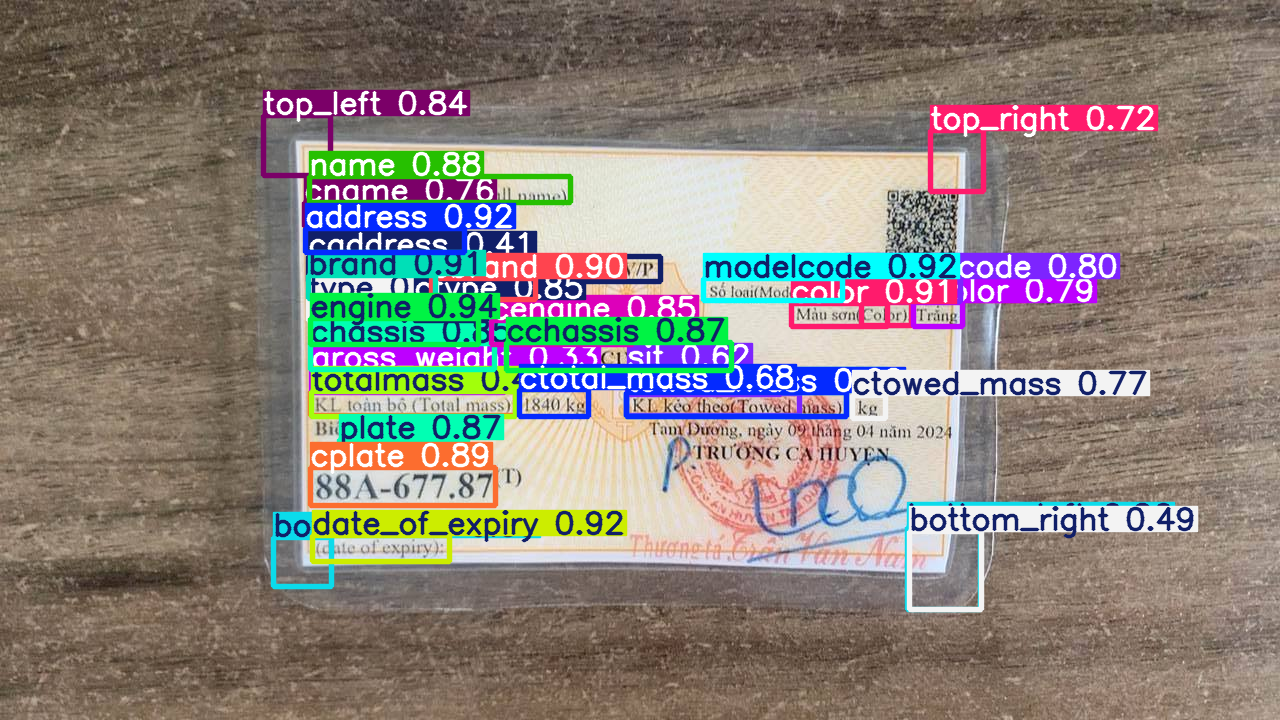

In [33]:
# Chạy suy diễn trên một bức ảnh
results = model.predict(source=image_path)

# Hiển thị kết quả
results[0].show()

In [34]:
print(results[0].names)

{0: 'address', 1: 'bottom_left', 2: 'bottom_right', 3: 'brand', 4: 'caddress', 5: 'capacity', 6: 'cbrand', 7: 'ccapacity', 8: 'cchassis', 9: 'ccolor', 10: 'cdate_of_expiry', 11: 'cengine', 12: 'cgross_weight', 13: 'cgrossweight', 14: 'chassis', 15: 'cmodelcode', 16: 'cname', 17: 'color', 18: 'cplate', 19: 'csit', 20: 'ctotal_mass', 21: 'ctotalmass', 22: 'ctowed_mass', 23: 'ctowedmass', 24: 'ctype', 25: 'dang_ky_mat_truoc', 26: 'dang_ky_mat_truoc_1', 27: 'date_of_expiry', 28: 'engine', 29: 'gross_weight', 30: 'grossweight', 31: 'modecode', 32: 'modelcode', 33: 'name', 34: 'plate', 35: 'sit', 36: 'top_left', 37: 'top_right', 38: 'total_mass', 39: 'totalmass', 40: 'towed_mass', 41: 'towedmass', 42: 'type'}
